In [2]:
import pandas as pd #data processing, CSV file I/O (e.g portugal_ads_proprieties.csv)
import numpy as np # linear algebra

In [3]:
import seaborn as sb #statistical data visualization
import matplotlib.pyplot as plt # make matplotlib work like MATLAB
#using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code
%matplotlib inline

In [4]:
df = pd.read_csv('portugal_ads_proprieties.csv')
df.head()

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,Used,Rent,House
1,"Mozelos, Santa Maria da Feira, Aveiro",2,5000.0,300.0,1.0,NaN,Rent,House
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,Used,Rent,House
3,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,Renovated,Rent,House
4,"Oiã, Oliveira do Bairro, Aveiro",4,1200.0,240.0,NaN,NaN,Rent,House


In [5]:
#Splitting Strings
df['Location'].str.rsplit(',', expand=True, n=1)

,0,1
0,"Cortegaça, Ovar",Aveiro
1,"Mozelos, Santa Maria da Feira",Aveiro
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Aveiro
3,"Macinhata do Vouga, Águeda",Aveiro
4,"Oiã, Oliveira do Bairro",Aveiro
...,...,...
62653,"Romarigães, Paredes de Coura",Viana do Castelo
62654,Cardielos e Serreleis,Viana do Castelo
62655,Cardielos e Serreleis,Viana do Castelo
62656,Chafé,Viana do Castelo


In [6]:
#Splitting Strings
df[['City', 'District']] = df['Location'].str.rsplit(',', expand=True, n=1)

In [7]:
df.head()

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,City,District
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,Used,Rent,House,"Cortegaça, Ovar",Aveiro
1,"Mozelos, Santa Maria da Feira, Aveiro",2,5000.0,300.0,1.0,NaN,Rent,House,"Mozelos, Santa Maria da Feira",Aveiro
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,Used,Rent,House,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Aveiro
3,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,Renovated,Rent,House,"Macinhata do Vouga, Águeda",Aveiro
4,"Oiã, Oliveira do Bairro, Aveiro",4,1200.0,240.0,NaN,NaN,Rent,House,"Oiã, Oliveira do Bairro",Aveiro


In [8]:
df = df.drop(columns=['Location'])
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,City,District
0,4,2000.0,147.0,4.0,Used,Rent,House,"Cortegaça, Ovar",Aveiro
1,2,5000.0,300.0,1.0,NaN,Rent,House,"Mozelos, Santa Maria da Feira",Aveiro
2,4,1200.0,134.0,2.0,Used,Rent,House,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Aveiro
3,4,2500.0,236.0,2.0,Renovated,Rent,House,"Macinhata do Vouga, Águeda",Aveiro
4,4,1200.0,240.0,NaN,NaN,Rent,House,"Oiã, Oliveira do Bairro",Aveiro


In [9]:
df.District.unique()

array([' Aveiro', ' Beja', ' Braga', ' Bragança', ' Castelo Branco',
       ' Coimbra', ' Évora', ' Faro', ' Guarda', ' Ilha da Graciosa',
       ' Ilha da Madeira', ' Ilha de São Miguel', ' Ilha do Corvo',
       ' Ilha do Faial', ' Leiria', ' Lisboa', ' Portalegre', ' Porto',
       ' Santarém', ' Setúbal', ' Viana do Castelo', ' Vila Real',
       ' Viseu', None, ' Ilha das Flores', ' Ilha de Porto Santo',
       ' Ilha de Santa Maria', ' Ilha de São Jorge', ' Ilha do Pico',
       ' Ilha Terceira'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62658 entries, 0 to 62657
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          62658 non-null  object 
 1   Price          61488 non-null  float64
 2   Area           62658 non-null  float64
 3   Bathrooms      50146 non-null  float64
 4   Condition      37533 non-null  object 
 5   AdsType        62658 non-null  object 
 6   ProprietyType  62658 non-null  object 
 7   City           62658 non-null  object 
 8   District       62411 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.3+ MB


In [11]:
df['District'].value_counts()

 Porto                  9941
 Lisboa                 7701
 Setúbal                6998
 Faro                   6185
 Braga                  5703
 Aveiro                 4463
 Leiria                 3910
 Santarém               3744
 Coimbra                2891
 Viana do Castelo       2070
 Castelo Branco         1190
 Viseu                  1121
 Ilha da Madeira        1061
 Beja                    953
 Évora                   880
 Vila Real               800
 Ilha de São Miguel      670
 Portalegre              638
 Guarda                  505
 Bragança                401
 Ilha Terceira           314
 Ilha do Pico             65
 Ilha de Santa Maria      48
 Ilha de Porto Santo      45
 Ilha do Faial            36
 Ilha da Graciosa         28
 Ilha das Flores          24
 Ilha de São Jorge        20
 Ilha do Corvo             6
Name: District, dtype: int64

In [12]:
#Clean white spaces before and after
df['District'] = df['District'].str.strip()
df['District'].value_counts()

Porto                  9941
Lisboa                 7701
Setúbal                6998
Faro                   6185
Braga                  5703
Aveiro                 4463
Leiria                 3910
Santarém               3744
Coimbra                2891
Viana do Castelo       2070
Castelo Branco         1190
Viseu                  1121
Ilha da Madeira        1061
Beja                    953
Évora                   880
Vila Real               800
Ilha de São Miguel      670
Portalegre              638
Guarda                  505
Bragança                401
Ilha Terceira           314
Ilha do Pico             65
Ilha de Santa Maria      48
Ilha de Porto Santo      45
Ilha do Faial            36
Ilha da Graciosa         28
Ilha das Flores          24
Ilha de São Jorge        20
Ilha do Corvo             6
Name: District, dtype: int64

In [13]:
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,City,District
0,4,2000.0,147.0,4.0,Used,Rent,House,"Cortegaça, Ovar",Aveiro
1,2,5000.0,300.0,1.0,NaN,Rent,House,"Mozelos, Santa Maria da Feira",Aveiro
2,4,1200.0,134.0,2.0,Used,Rent,House,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Aveiro
3,4,2500.0,236.0,2.0,Renovated,Rent,House,"Macinhata do Vouga, Águeda",Aveiro
4,4,1200.0,240.0,NaN,NaN,Rent,House,"Oiã, Oliveira do Bairro",Aveiro


In [14]:
df.isnull().sum()

Rooms                0
Price             1170
Area                 0
Bathrooms        12512
Condition        25125
AdsType              0
ProprietyType        0
City                 0
District           247
dtype: int64

In [15]:
#Delete unnecessary
df = df.dropna(subset=['Price'])

In [16]:
df.isnull().sum()

Rooms                0
Price                0
Area                 0
Bathrooms        12282
Condition        24665
AdsType              0
ProprietyType        0
City                 0
District           245
dtype: int64

In [17]:
#Fix missing values
df = df.fillna({'Condition': 'Used'})
df = df.fillna({'Bathrooms': 1})
df = df.dropna(subset=['District'])
df.isnull().sum()

Rooms            0
Price            0
Area             0
Bathrooms        0
Condition        0
AdsType          0
ProprietyType    0
City             0
District         0
dtype: int64

In [18]:
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,City,District
0,4,2000.0,147.0,4.0,Used,Rent,House,"Cortegaça, Ovar",Aveiro
1,2,5000.0,300.0,1.0,Used,Rent,House,"Mozelos, Santa Maria da Feira",Aveiro
2,4,1200.0,134.0,2.0,Used,Rent,House,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Aveiro
3,4,2500.0,236.0,2.0,Renovated,Rent,House,"Macinhata do Vouga, Águeda",Aveiro
4,4,1200.0,240.0,1.0,Used,Rent,House,"Oiã, Oliveira do Bairro",Aveiro


In [19]:
df['Bathrooms'].head()

0    4.0
1    1.0
2    2.0
3    2.0
4    1.0
Name: Bathrooms, dtype: float64

In [20]:
# Replacing Island name for district
df['District'].replace(['Ilha da Madeira', 'Ilha de São Miguel', 'Ilha Terceira', 'Ilha do Pico', 'Ilha de Porto Santo',
                        'Ilha do Faial', 'Ilha de Santa Maria', 'Ilha de São Jorge', 'Ilha das Flores', 'Ilha da Graciosa',
                       'Ilha do Corvo'], ['Madeira', 'Açores', 'Açores', 'Açores', 'Madeira', 'Açores', 'Açores', 'Açores', 'Açores', 'Açores',
                        'Açores'], inplace=True)
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,City,District
0,4,2000.0,147.0,4.0,Used,Rent,House,"Cortegaça, Ovar",Aveiro
1,2,5000.0,300.0,1.0,Used,Rent,House,"Mozelos, Santa Maria da Feira",Aveiro
2,4,1200.0,134.0,2.0,Used,Rent,House,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Aveiro
3,4,2500.0,236.0,2.0,Renovated,Rent,House,"Macinhata do Vouga, Águeda",Aveiro
4,4,1200.0,240.0,1.0,Used,Rent,House,"Oiã, Oliveira do Bairro",Aveiro


In [21]:
df['District'].value_counts()

Porto               9731
Lisboa              7620
Setúbal             6920
Faro                6111
Braga               5508
Aveiro              4408
Leiria              3825
Santarém            3692
Coimbra             2856
Viana do Castelo    2011
Castelo Branco      1175
Açores              1157
Viseu               1102
Madeira             1041
Beja                 928
Évora                870
Vila Real            772
Portalegre           631
Guarda               496
Bragança             389
Name: District, dtype: int64

In [22]:
def long(x):
    if x == 'Porto':
        return 41.1579
    elif x == 'Lisboa':
        return 38.7223 
    elif x == 'Setúbal':
        return 38.5254
    elif x == 'Faro':
        return 37.0194
    elif x == 'Braga':
        return 41.5454
    elif x == 'Aveiro':
        return 40.6405
    elif x == 'Leiria':
        return 39.7495
    elif x == 'Coimbra':
        return 40.2033
    elif x == 'Santarém':
        return 39.2367
    elif x == 'Açores':
        return 37.7412
    elif x == 'Madeira':
        return 32.7607
    elif x == 'Viana do Castelo':
        return 41.6918
    elif x == 'Viseu':
        return 40.6588
    elif x == 'Castelo Branco':
        return 39.8196
    elif x == 'Beja':
        return 38.0153
    elif x == 'Vila Real':
        return 41.3010
    elif x == 'Évora':
        return 38.5714
    elif x == 'Portalegre':
        return 39.2967
    elif x == 'Guarda':
        return 40.5308
    elif x == 'Bragança':
        return 41.8061

In [23]:
# Adding Longitude
df['Longitude'] = df['District'].apply(long)
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,City,District,Longitude
0,4,2000.0,147.0,4.0,Used,Rent,House,"Cortegaça, Ovar",Aveiro,40.6405
1,2,5000.0,300.0,1.0,Used,Rent,House,"Mozelos, Santa Maria da Feira",Aveiro,40.6405
2,4,1200.0,134.0,2.0,Used,Rent,House,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Aveiro,40.6405
3,4,2500.0,236.0,2.0,Renovated,Rent,House,"Macinhata do Vouga, Águeda",Aveiro,40.6405
4,4,1200.0,240.0,1.0,Used,Rent,House,"Oiã, Oliveira do Bairro",Aveiro,40.6405


In [24]:
def lat(x):
    if x == 'Porto':
        return 8.6291
    elif x == 'Lisboa':
        return 9.1393 
    elif x == 'Setúbal':
        return 8.8941
    elif x == 'Faro':
        return 7.9304
    elif x == 'Braga':
        return 8.4265
    elif x == 'Aveiro':
        return 8.6538
    elif x == 'Leiria':
        return 8.8077
    elif x == 'Coimbra':
        return 8.4103
    elif x == 'Santarém':
        return 8.6860
    elif x == 'Açores':
        return 25.5672
    elif x == 'Madeira':
        return 16.9595
    elif x == 'Viana do Castelo':
        return 8.8344
    elif x == 'Viseu':
        return 7.9148
    elif x == 'Castelo Branco':
        return 7.4965
    elif x == 'Beja':
        return 7.8627
    elif x == 'Vila Real':
        return 7.7422
    elif x == 'Évora':
        return 7.9135
    elif x == 'Portalegre':
        return 7.4285
    elif x == 'Guarda':
        return 7.2221
    elif x == 'Bragança':
        return 6.7567

In [25]:
# Adding Latitude
df['Latitude'] = df['District'].apply(lat)
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,City,District,Longitude,Latitude
0,4,2000.0,147.0,4.0,Used,Rent,House,"Cortegaça, Ovar",Aveiro,40.6405,8.6538
1,2,5000.0,300.0,1.0,Used,Rent,House,"Mozelos, Santa Maria da Feira",Aveiro,40.6405,8.6538
2,4,1200.0,134.0,2.0,Used,Rent,House,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Aveiro,40.6405,8.6538
3,4,2500.0,236.0,2.0,Renovated,Rent,House,"Macinhata do Vouga, Águeda",Aveiro,40.6405,8.6538
4,4,1200.0,240.0,1.0,Used,Rent,House,"Oiã, Oliveira do Bairro",Aveiro,40.6405,8.6538


In [26]:
# Reorder Columns
new_columns = ['District', 'City', 'Longitude', 'Latitude', 'Area', 'Rooms', 'Bathrooms', 'Price', 'Condition', 'ProprietyType', 'AdsType']
df = df[new_columns]
df.head()

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
0,Aveiro,"Cortegaça, Ovar",40.6405,8.6538,147.0,4,4.0,2000.0,Used,House,Rent
1,Aveiro,"Mozelos, Santa Maria da Feira",40.6405,8.6538,300.0,2,1.0,5000.0,Used,House,Rent
2,Aveiro,"Santa Maria da Feira, Travanca, Sanfins e Esp...",40.6405,8.6538,134.0,4,2.0,1200.0,Used,House,Rent
3,Aveiro,"Macinhata do Vouga, Águeda",40.6405,8.6538,236.0,4,2.0,2500.0,Renovated,House,Rent
4,Aveiro,"Oiã, Oliveira do Bairro",40.6405,8.6538,240.0,4,1.0,1200.0,Used,House,Rent


In [27]:
def custom_rsplit(x):
    if x is not None:
        return x.rsplit(',', 1)
    else:
        return [x]

In [28]:
teste = df['City'].apply(custom_rsplit)

In [29]:
teste

0                                      [ Cortegaça,  Ovar]
1                        [ Mozelos,  Santa Maria da Feira]
2        [ Santa Maria da Feira, Travanca, Sanfins e Es...
3                           [ Macinhata do Vouga,  Águeda]
4                              [ Oiã,  Oliveira do Bairro]
                               ...                        
62651            [ Caminha (Matriz) e Vilarelho,  Caminha]
62652              [ Arca e Ponte de Lima,  Ponte de Lima]
62653                     [ Romarigães,  Paredes de Coura]
62654                             [ Cardielos e Serreleis]
62655                             [ Cardielos e Serreleis]
Name: City, Length: 61243, dtype: object

In [30]:
teste.str.rsplit(',', expand=True, n=0)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
62651,NaN
62652,NaN
62653,NaN
62654,NaN


In [31]:
df['City'].str.rsplit(',', expand=True, n=1)

,0,1
0,Cortegaça,Ovar
1,Mozelos,Santa Maria da Feira
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Santa Maria da Feira
3,Macinhata do Vouga,Águeda
4,Oiã,Oliveira do Bairro
...,...,...
62651,Caminha (Matriz) e Vilarelho,Caminha
62652,Arca e Ponte de Lima,Ponte de Lima
62653,Romarigães,Paredes de Coura
62654,Cardielos e Serreleis,None


In [32]:
split_data = df['City'].str.rsplit(',', expand=True, n=1)

In [33]:
split_data[1] = split_data[1].fillna(split_data[0])

In [34]:
split_data

,0,1
0,Cortegaça,Ovar
1,Mozelos,Santa Maria da Feira
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",Santa Maria da Feira
3,Macinhata do Vouga,Águeda
4,Oiã,Oliveira do Bairro
...,...,...
62651,Caminha (Matriz) e Vilarelho,Caminha
62652,Arca e Ponte de Lima,Ponte de Lima
62653,Romarigães,Paredes de Coura
62654,Cardielos e Serreleis,Cardielos e Serreleis


In [35]:
df['City'] = split_data[1]

In [36]:
df.isnull().sum()

District         0
City             0
Longitude        0
Latitude         0
Area             0
Rooms            0
Bathrooms        0
Price            0
Condition        0
ProprietyType    0
AdsType          0
dtype: int64

In [37]:
df.head()

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
0,Aveiro,Ovar,40.6405,8.6538,147.0,4,4.0,2000.0,Used,House,Rent
1,Aveiro,Santa Maria da Feira,40.6405,8.6538,300.0,2,1.0,5000.0,Used,House,Rent
2,Aveiro,Santa Maria da Feira,40.6405,8.6538,134.0,4,2.0,1200.0,Used,House,Rent
3,Aveiro,Águeda,40.6405,8.6538,236.0,4,2.0,2500.0,Renovated,House,Rent
4,Aveiro,Oliveira do Bairro,40.6405,8.6538,240.0,4,1.0,1200.0,Used,House,Rent


In [38]:
df['AdsType'].value_counts()

Sell        60333
Rent          555
Vacation      355
Name: AdsType, dtype: int64

In [39]:
df[['District', 'AdsType']].value_counts()

District          AdsType 
Porto             Sell        9641
Lisboa            Sell        7434
Setúbal           Sell        6860
Faro              Sell        5747
Braga             Sell        5450
Aveiro            Sell        4392
Leiria            Sell        3796
Santarém          Sell        3664
Coimbra           Sell        2847
Viana do Castelo  Sell        1991
Castelo Branco    Sell        1167
Açores            Sell        1153
Viseu             Sell        1095
Madeira           Sell        1036
Beja              Sell         921
Évora             Sell         864
Vila Real         Sell         770
Portalegre        Sell         627
Guarda            Sell         491
Bragança          Sell         387
Faro              Vacation     312
Lisboa            Rent         182
Porto             Rent          87
Setúbal           Rent          59
Faro              Rent          52
Braga             Rent          43
Santarém          Rent          26
Leiria            Rent      

In [40]:
# Creating a temporary sorted table by AdsType
pivot_table = df.pivot_table(index='District', columns='AdsType', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total', ascending = False)
print(pivot_table)

AdsType           Rent  Sell  Vacation  Total
District                                     
Porto               87  9641         3   9731
Lisboa             182  7434         4   7620
Setúbal             59  6860         1   6920
Faro                52  5747       312   6111
Braga               43  5450        15   5508
Aveiro              15  4392         1   4408
Leiria              24  3796         5   3825
Santarém            26  3664         2   3692
Coimbra              7  2847         2   2856
Viana do Castelo    12  1991         8   2011
Castelo Branco       8  1167         0   1175
Açores               4  1153         0   1157
Viseu                7  1095         0   1102
Madeira              5  1036         0   1041
Beja                 7   921         0    928
Évora                6   864         0    870
Vila Real            2   770         0    772
Portalegre           4   627         0    631
Guarda               3   491         2    496
Bragança             2   387      

<Axes: xlabel='AdsType', ylabel='District'>

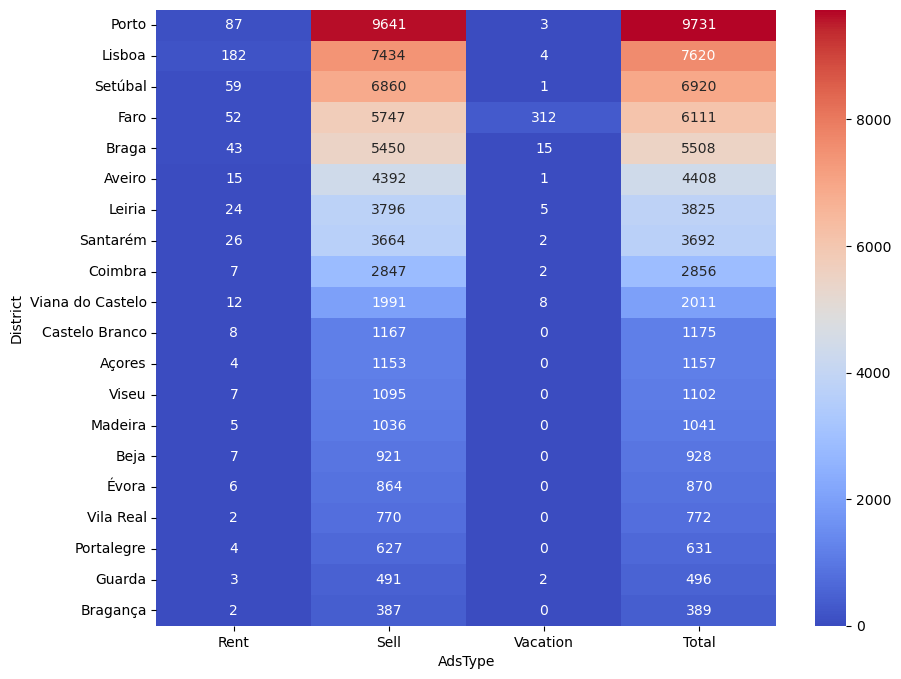

In [41]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d')

In [42]:
import geopandas as gpd
gdf_portugal = gpd.read_file('ContinenteDistritos.geojson')
print(gdf_portugal)

    DI          Distrito N_Freguesi N_Concelho     Area_Ha  \
0   01            AVEIRO        147         19   280094.16   
1   02              BEJA         75         14  1026332.49   
2   03             BRAGA        347         14   270610.54   
3   04          BRAGANÇA        226         12   659853.71   
4   05    CASTELO BRANCO        120         11   662747.31   
5   06           COIMBRA        155         17   397373.28   
6   07             ÉVORA         69         14   739346.41   
7   08              FARO         67         16   499679.49   
8   09            GUARDA        242         14   553530.81   
9   10            LEIRIA        110         16   350578.64   
10  11            LISBOA        134         16   281613.57   
11  12        PORTALEGRE         69         15   608433.57   
12  13             PORTO        243         18   233169.69   
13  14          SANTARÉM        141         21   671834.73   
14  15           SETÚBAL         55         13   521405.92   
15  16  

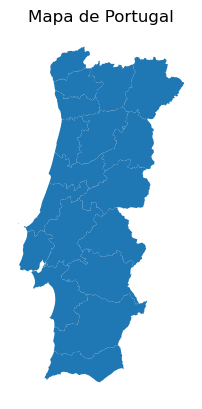

In [43]:
# Exibir o mapa de Portugal
gdf_portugal.plot()
plt.title('Mapa de Portugal')
plt.axis('off')
plt.show()

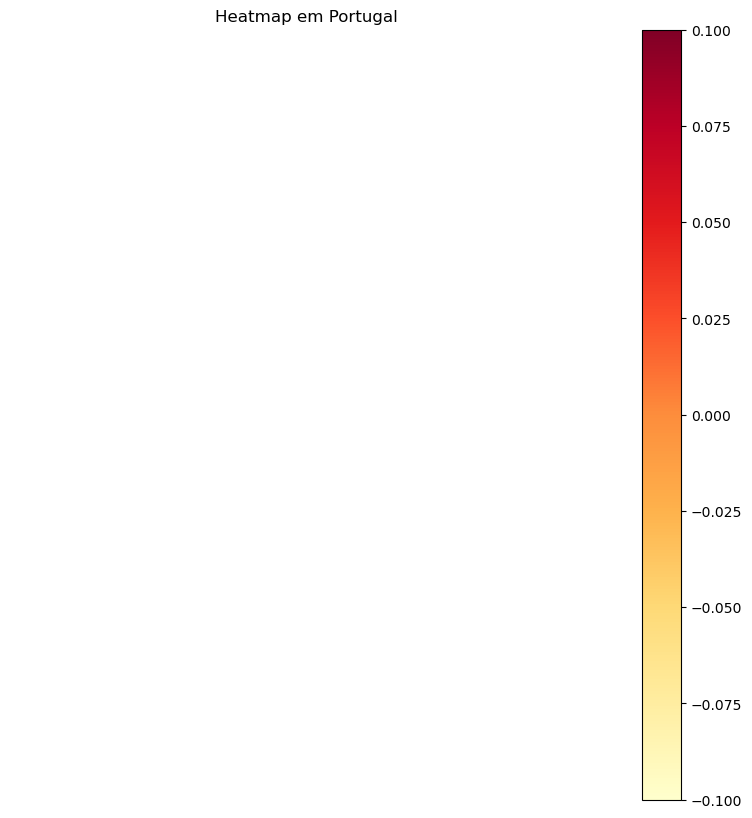

AdsType,District,Total
0,Porto,9731
1,Lisboa,7620
2,Setúbal,6920
3,Faro,6111
4,Braga,5508


In [80]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo GeoJSON do mapa de Portugal
gdf_portugal = gpd.read_file('ContinenteDistritos.geojson')

# Supondo que você tenha um DataFrame chamado pivot_table
# com colunas 'Total' e 'District', onde 'District' é o índice
# Certifique-se de substituir 'Sua_Coluna' pelo nome correto da sua coluna
pivot_table['Total'] = pd.to_numeric(pivot_table['Total'])  # Certifica-se de que 'Total' é numérico

# Crie um novo DataFrame sem o índice
new_pivot_table = pivot_table.reset_index()[['District', 'Total']]

# Mescla os DataFrames usando a coluna 'District'
merged_df = gdf_portugal.merge(new_pivot_table, left_on='Distrito', right_on='District', how='left')

# Exibir o mapa de calor (heatmap)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use o método plot() com a coluna 'Total' para criar o mapa de calor
merged_df.plot(column='Total', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adicione um título
plt.title('Heatmap em Portugal')

# Remova os eixos
ax.set_axis_off()

# Exiba a barra de cores
plt.show()



new_pivot_table.head()

In [67]:
pivot_table = pivot_table.rename(columns={'Disctrict': 'Distrito'})
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Porto to Bragança
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Rent      20 non-null     int64
 1   Sell      20 non-null     int64
 2   Vacation  20 non-null     int64
 3   Total     20 non-null     int64
dtypes: int64(4)
memory usage: 1.3+ KB


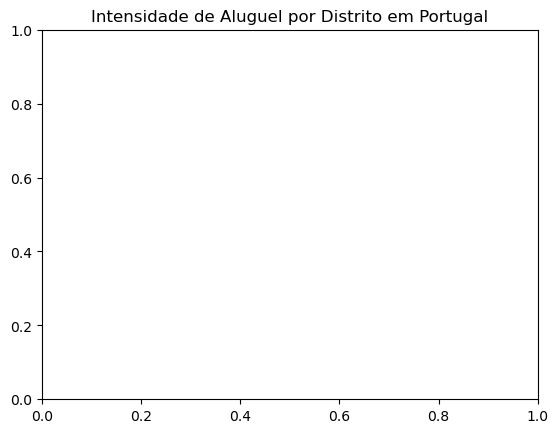

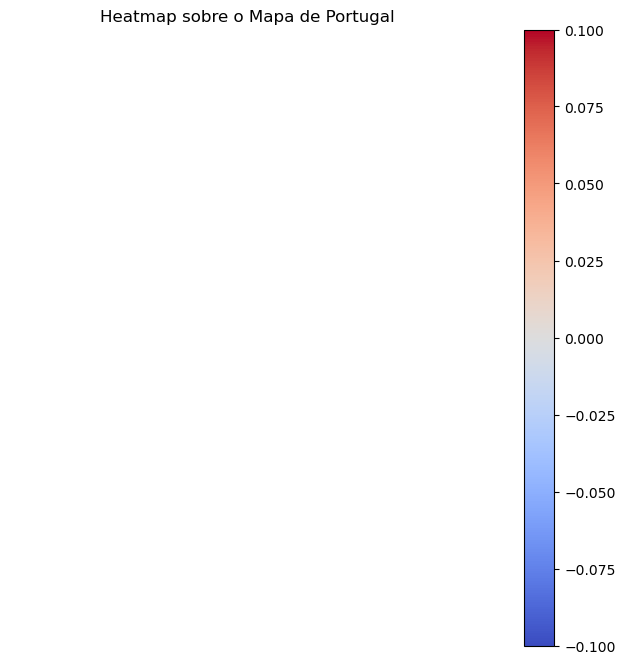

In [139]:
# Suponha que 'District' seja a coluna de chave comum entre pivot_table e gdf_portugal
# 'pivot_table' é o DataFrame que você mencionou antes
# Certifique-se de que 'District' exista em ambos os DataFrames
# Exibir o mapa com as cores variando de acordo com a coluna 'Rent'
merged_gdf.plot(column='Rent', cmap=cmap, linewidth=0.8, ax=ax, legend=True, vmin=vmin, vmax=vmax)

plt.title('Intensidade de Aluguel por Distrito em Portugal')

# Exibir o mapa com os dados da tabela pivot_table
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(column='Total', cmap='coolwarm', linewidth=0.8, ax=ax, legend=True)

plt.title('Heatmap sobre o Mapa de Portugal')
plt.axis('off')  # Para desativar os eixos
plt.show()

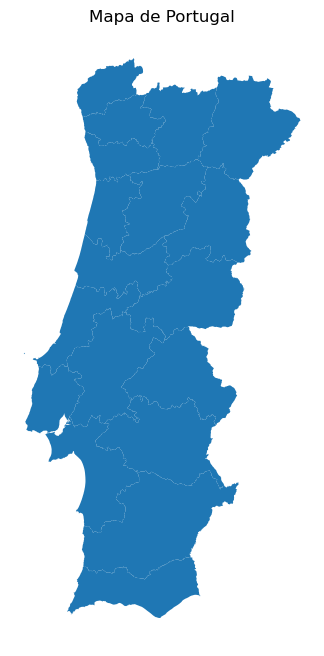

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_portugal.plot(ax=ax)

plt.title('Mapa de Portugal')
plt.axis('off')  # Para desativar os eixos
plt.show()

In [136]:
print(pivot_table)

AdsType           Rent  Sell  Vacation  Total
District                                     
Porto               87  9641         3   9731
Lisboa             182  7434         4   7620
Setúbal             59  6860         1   6920
Faro                52  5747       312   6111
Braga               43  5450        15   5508
Aveiro              15  4392         1   4408
Leiria              24  3796         5   3825
Santarém            26  3664         2   3692
Coimbra              7  2847         2   2856
Viana do Castelo    12  1991         8   2011
Castelo Branco       8  1167         0   1175
Açores               4  1153         0   1157
Viseu                7  1095         0   1102
Madeira              5  1036         0   1041
Beja                 7   921         0    928
Évora                6   864         0    870
Vila Real            2   770         0    772
Portalegre           4   627         0    631
Guarda               3   491         2    496
Bragança             2   387      

In [135]:

# Suponha que 'District' seja a coluna de chave comum entre pivot_table e gdf_portugal
# 'pivot_table' é o DataFrame que você mencionou antes
# Certifique-se de que 'District' exista em ambos os DataFrames
merged_gdf = gdf_portugal.merge(pivot_table, on='Distrito', how='left')

# Defina a paleta de cores com base no valor da coluna 'Total'
cmap = sns.color_palette('coolwarm', as_cmap=True)
vmin, vmax = merged_gdf['Total'].min(), merged_gdf['Total'].max()

# Exibir o mapa com as cores variando de acordo com o 'Total'
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(column='Total', cmap=cmap, linewidth=0.8, ax=ax, legend=True, vmin=vmin, vmax=vmax)

plt.title('Intensidade de Casas por Distrito em Portugal')
plt.axis('off')  # Para desativar os eixos
plt.show()

KeyError: 'Distrito'

In [140]:
gdf_portugal.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DI          18 non-null     object  
 1   Distrito    18 non-null     object  
 2   N_Freguesi  18 non-null     object  
 3   N_Concelho  18 non-null     object  
 4   Area_Ha     18 non-null     object  
 5   geometry    18 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 996.0+ bytes


In [143]:
df['Rooms'].replace(['1', '2', '3', '4', '5',
                        '6', '7', '8', '9', '10 ou superior'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], inplace=True)
df['Rooms'] = df['Rooms'].astype(int)

In [144]:
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61243 entries, 0 to 62655
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       61243 non-null  object 
 1   City           61243 non-null  object 
 2   Longitude      61243 non-null  float64
 3   Latitude       61243 non-null  float64
 4   Area           61243 non-null  float64
 5   Rooms          61243 non-null  int64  
 6   Bathrooms      61243 non-null  int64  
 7   Price          61243 non-null  float64
 8   Condition      61243 non-null  object 
 9   ProprietyType  61243 non-null  object 
 10  AdsType        61243 non-null  object 
 11  Total_Casas    61243 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 6.1+ MB


In [146]:
df.head()

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType,Total_Casas
0,Aveiro,Ovar,40.6405,8.6538,147.0,4,4,2000.0,Used,House,Rent,2200.2943
1,Aveiro,Santa Maria da Feira,40.6405,8.6538,300.0,2,1,5000.0,Used,House,Rent,5350.2943
2,Aveiro,Santa Maria da Feira,40.6405,8.6538,134.0,4,2,1200.0,Used,House,Rent,1385.2943
3,Aveiro,Águeda,40.6405,8.6538,236.0,4,2,2500.0,Renovated,House,Rent,2787.2943
4,Aveiro,Oliveira do Bairro,40.6405,8.6538,240.0,4,1,1200.0,Used,House,Rent,1490.2943


In [148]:
df = df.drop(columns='Total_Casas')

In [149]:
df.head()

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
0,Aveiro,Ovar,40.6405,8.6538,147.0,4,4,2000.0,Used,House,Rent
1,Aveiro,Santa Maria da Feira,40.6405,8.6538,300.0,2,1,5000.0,Used,House,Rent
2,Aveiro,Santa Maria da Feira,40.6405,8.6538,134.0,4,2,1200.0,Used,House,Rent
3,Aveiro,Águeda,40.6405,8.6538,236.0,4,2,2500.0,Renovated,House,Rent
4,Aveiro,Oliveira do Bairro,40.6405,8.6538,240.0,4,1,1200.0,Used,House,Rent


In [150]:
max_area = df['Area'].quantile(0.998)
max_area

6174.8320000001695

In [166]:
df[df['Area']>max_area]

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
513,Setúbal,Moita,38.5254,8.8941,50680.0,0,1,1500.0,Used,House,Rent
526,Setúbal,Seixal,38.5254,8.8941,34700.0,1,2,1200.0,Used,House,Rent
2440,Aveiro,Ílhavo,40.6405,8.6538,1273500.0,8,4,25000000.0,Used,House,Sell
2702,Aveiro,Aradas,40.6405,8.6538,12450.0,3,1,250000.0,Used,House,Sell
4448,Aveiro,Santa Maria da Feira,40.6405,8.6538,55000.0,1,1,115000.0,Used,House,Sell
...,...,...,...,...,...,...,...,...,...,...,...
59434,Viana do Castelo,Ponte de Lima,41.6918,8.8344,6200.0,5,4,900000.0,Used,House,Sell
59853,Viana do Castelo,Meixedo e Vilar de Murteda,41.6918,8.8344,341700.0,2,1,120000.0,Used,House,Sell
60063,Viana do Castelo,Valença,41.6918,8.8344,6675.0,0,1,270000.0,Used,House,Sell
60616,Vila Real,Chaves,41.3010,7.7422,10500.0,4,2,400000.0,To recovery,House,Sell


In [165]:
df.loc[df['Price'] > 10000000]

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
2440,Aveiro,Ílhavo,40.6405,8.6538,1.273500e+06,8,4,25000000.0,Used,House,Sell
4862,Aveiro,Ovar,40.6405,8.6538,7.640000e+02,5,1,16000005.0,Used,House,Sell
5949,Beja,Trigaches e São Brissos,38.0153,7.8627,1.300000e+09,1,1,55000000.0,Used,House,Sell
9663,Braga,Amares,41.5454,8.4265,5.320000e+02,3,1,49411765.0,Used,House,Sell
9841,Braga,Vizela,41.5454,8.4265,3.590000e+02,6,1,35311765.0,Used,House,Sell
10225,Braga,Vila Nova de Famalicão,41.5454,8.4265,4.410000e+02,3,3,285000000.0,Under construction,House,Sell
11329,Braga,Barcelos,41.5454,8.4265,1.046000e+02,4,1,11470588.0,Used,House,Sell
11461,Braga,Vila Nova de Famalicão,41.5454,8.4265,1.654000e+02,3,1,23282353.0,Used,House,Sell
11484,Braga,Esposende,41.5454,8.4265,8.430000e+02,0,1,13000000.0,Used,House,Sell
18018,Faro,Loulé,37.0194,7.9304,6.600000e+02,4,4,12500000.0,Under construction,House,Sell


In [164]:
len(df.loc[df['Price'] > 10000000])

25

In [167]:
min_area = df['Area'].quantile(0.002)
min_area

24.75

In [168]:
df[df['Area']<min_area]

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
275,Lisboa,Torres Vedras,38.7223,9.1393,13.50,5,4,2850.0,Used,House,Rent
353,Lisboa,Mafra,38.7223,9.1393,1.00,4,3,1500.0,Used,House,Rent
1431,Aveiro,Águeda,40.6405,8.6538,24.00,2,2,155000.0,Used,House,Sell
2161,Aveiro,Albergaria-a-Velha,40.6405,8.6538,1.37,3,3,390000.0,Used,House,Sell
2372,Aveiro,Estarreja,40.6405,8.6538,5.00,2,1,46000.0,To recovery,House,Sell
...,...,...,...,...,...,...,...,...,...,...,...
61143,Viseu,Faíl e Vila Chã de Sá,40.6588,7.9148,1.00,3,2,320000.0,New,House,Sell
61949,Viseu,Mangualde,40.6588,7.9148,5.00,2,1,39900.0,Used,House,Sell
62078,Viseu,Santos Evos,40.6588,7.9148,22.00,0,1,12000.0,Used,House,Sell
62113,Viseu,Cinfães,40.6588,7.9148,20.00,1,1,72500.0,Used,House,Sell


In [169]:
f = df[(df.Area<max_area) & (df.Area>min_area)]
df.shape

(61243, 11)

In [170]:
max_price = df['Price'].quantile(0.99)
max_price

3200000.0

In [171]:
df[df['Price']>max_price]

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
2440,Aveiro,Ílhavo,40.6405,8.6538,1273500.00,8,4,25000000.0,Used,House,Sell
4862,Aveiro,Ovar,40.6405,8.6538,764.00,5,1,16000005.0,Used,House,Sell
5016,Beja,Salvada e Quintos,38.0153,7.8627,505.00,5,4,3970000.0,Renovated,House,Sell
5017,Beja,Salvada e Quintos,38.0153,7.8627,784.00,5,4,6470000.0,Renovated,House,Sell
5075,Beja,Beja (Salvador e Santa Maria da Feira),38.0153,7.8627,400.00,5,4,3500000.0,Used,House,Sell
...,...,...,...,...,...,...,...,...,...,...,...
60219,Viana do Castelo,Ponte de Lima,41.6918,8.8344,195.53,5,1,19588180.0,Used,House,Sell
60267,Viana do Castelo,Melgaço,41.6918,8.8344,190.00,4,1,9559950.0,Used,House,Sell
60545,Vila Real,São Pedro e São Dinis),41.3010,7.7422,220.50,4,4,49740934.0,Under construction,House,Sell
60546,Vila Real,São Pedro e São Dinis),41.3010,7.7422,220.50,4,4,41246806.0,Under construction,House,Sell


In [172]:
min_price = df['Price'].quantile(0.01)
min_price

4500.0

In [173]:
df[df['Price']<min_price]

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
0,Aveiro,Ovar,40.6405,8.6538,147.0,4,4,2000.0,Used,House,Rent
2,Aveiro,Santa Maria da Feira,40.6405,8.6538,134.0,4,2,1200.0,Used,House,Rent
3,Aveiro,Águeda,40.6405,8.6538,236.0,4,2,2500.0,Renovated,House,Rent
4,Aveiro,Oliveira do Bairro,40.6405,8.6538,240.0,4,1,1200.0,Used,House,Rent
5,Aveiro,Aradas,40.6405,8.6538,200.0,3,3,1250.0,Used,House,Rent
...,...,...,...,...,...,...,...,...,...,...,...
62651,Viana do Castelo,Caminha,41.6918,8.8344,300.0,6,4,1253.0,Used,House,Vacation
62652,Viana do Castelo,Ponte de Lima,41.6918,8.8344,162.0,3,2,1400.0,Used,House,Vacation
62653,Viana do Castelo,Paredes de Coura,41.6918,8.8344,100.0,1,1,500.0,New,House,Vacation
62654,Viana do Castelo,Cardielos e Serreleis,41.6918,8.8344,120.0,3,1,850.0,Renovated,House,Vacation


In [174]:
df = df[(df.Price<max_price) & (df.Price>min_price)]
df.shape

(60002, 11)

In [175]:
df[df['Rooms']<1]

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
312,Lisboa,Cascais,38.7223,9.1393,97.5,0,3,250000.0,Used,House,Rent
659,Aveiro,Ílhavo,40.6405,8.6538,258.0,0,1,390000.0,Used,House,Sell
797,Aveiro,Santa Maria da Feira,40.6405,8.6538,465.0,0,1,530000.0,Used,House,Sell
991,Aveiro,Esgueira,40.6405,8.6538,290.8,0,1,650000.0,Used,House,Sell
1007,Aveiro,São João da Madeira,40.6405,8.6538,310.0,0,4,450000.0,Used,House,Sell
...,...,...,...,...,...,...,...,...,...,...,...
62230,Viseu,Cinfães,40.6588,7.9148,280.0,0,1,10000.0,Used,House,Sell
62240,Viseu,Nelas,40.6588,7.9148,44.0,0,1,17500.0,To recovery,House,Sell
62241,Viseu,Carregal do Sal,40.6588,7.9148,70.0,0,1,18000.0,Used,House,Sell
62253,Viseu,São João da Pesqueira,40.6588,7.9148,30.0,0,1,18000.0,Used,House,Sell


In [176]:
df = df[df.Rooms>=1]
df.shape

(58733, 11)

In [177]:
from sklearn.model_selection import train_test_split

x = df.drop(['Price'], axis=1)
y = df['Price']

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [179]:
tr_df = x_train.join(y_train)

In [180]:
tr_df

,District,City,Longitude,Latitude,Area,Rooms,Bathrooms,Condition,ProprietyType,AdsType,Price
13108,Castelo Branco,Covilhã,39.8196,7.4965,125.0,4,1,Used,House,Sell,45000.0
46552,Porto,Povoa de Varzim,41.1579,8.6291,168.0,3,1,Used,House,Sell,202000.0
43865,Porto,Maia,41.1579,8.6291,90.0,2,2,Used,House,Sell,185000.0
16575,Évora,Canaviais,38.5714,7.9135,168.0,4,3,Used,House,Sell,387000.0
49839,Santarém,Ourém,39.2367,8.6860,330.0,6,1,Used,House,Sell,269000.0
...,...,...,...,...,...,...,...,...,...,...,...
45344,Porto,Gondomar,41.1579,8.6291,206.0,4,4,Used,House,Sell,470000.0
16374,Évora,Borba,38.5714,7.9135,103.0,3,1,Used,House,Sell,62900.0
17224,Faro,Montenegro,37.0194,7.9304,243.0,5,4,Under construction,House,Sell,1050000.0
47806,Santarém,Torres Novas,39.2367,8.6860,128.0,4,3,Used,House,Sell,200000.0


array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

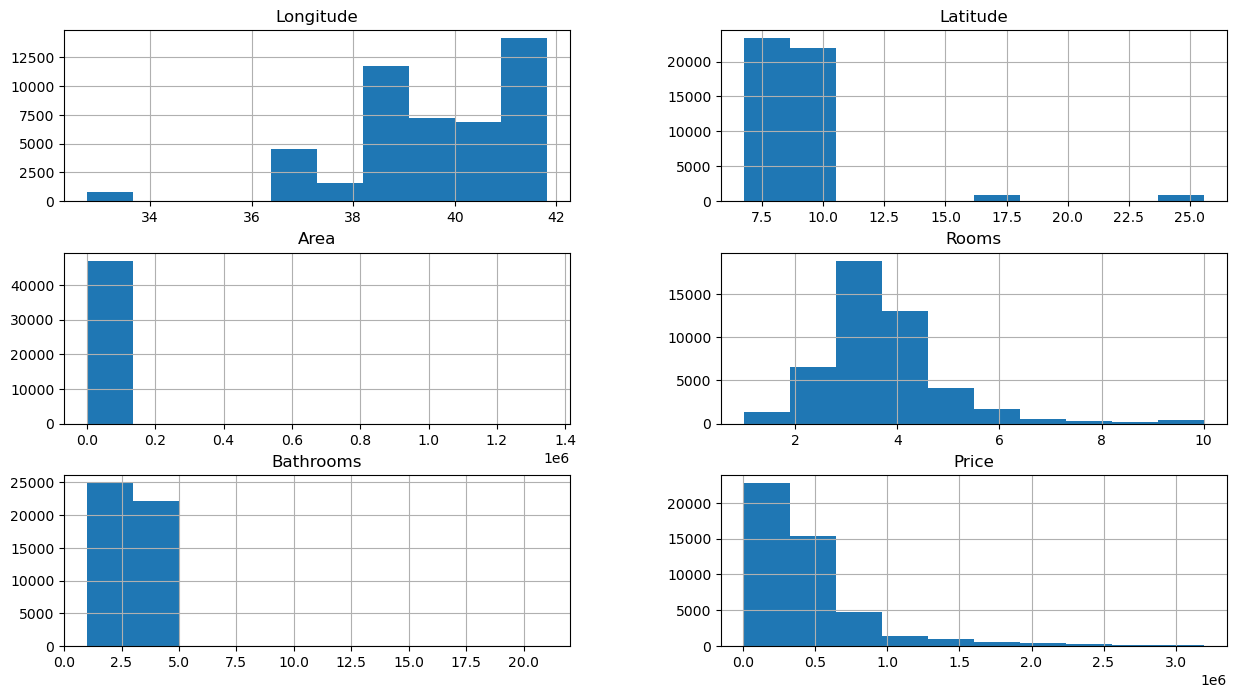

In [181]:
tr_df.hist(figsize=(15,8))

In [182]:
tr_df.corr()

/var/folders/vf/wv0wgmzn5v7gspzhjt65qmd40000gn/T/ipykernel_30257/320563595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tr_df.corr()


,Longitude,Latitude,Area,Rooms,Bathrooms,Price
Longitude,1.000000,-0.356245,0.000357,-0.010507,-0.076405,-0.237786
Latitude,-0.356245,1.000000,0.002322,-0.023948,-0.008729,0.003983
Area,0.000357,0.002322,1.000000,0.014011,0.004309,0.003193
Rooms,-0.010507,-0.023948,0.014011,1.000000,0.347314,0.346958
Bathrooms,-0.076405,-0.008729,0.004309,0.347314,1.000000,0.415286
Price,-0.237786,0.003983,0.003193,0.346958,0.415286,1.000000


/var/folders/vf/wv0wgmzn5v7gspzhjt65qmd40000gn/T/ipykernel_30257/250732547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tr_df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

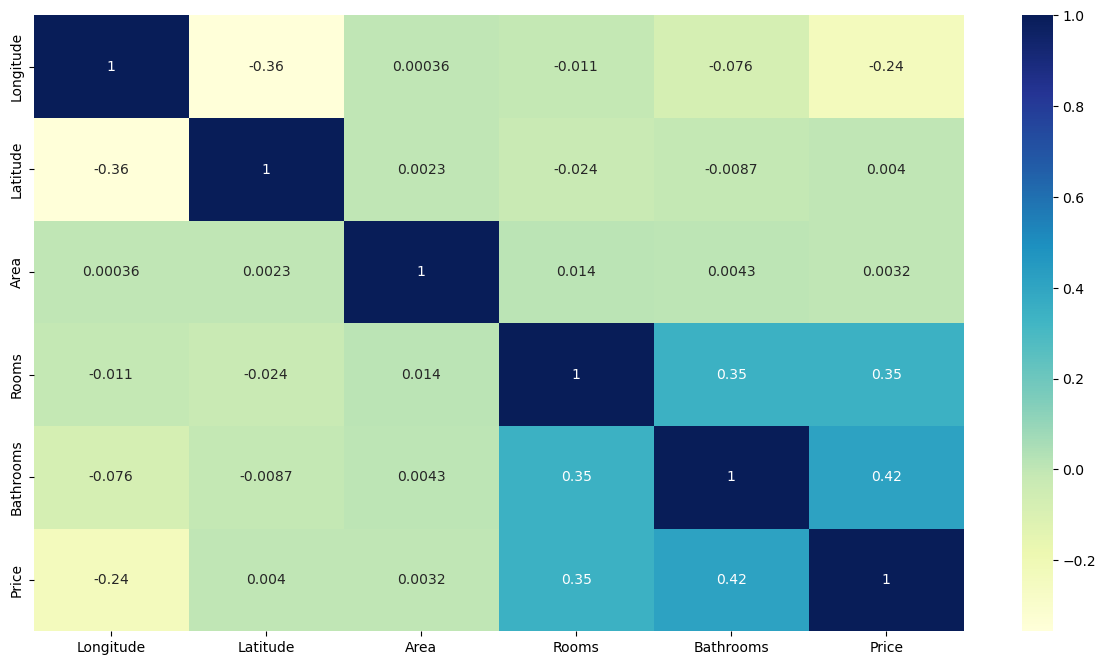

In [185]:
plt.figure(figsize=(15,8))
sns.heatmap(tr_df.corr(), annot=True, cmap='YlGnBu')

In [187]:
tr_df = pd.get_dummies(tr_df, columns=['District', 'ProprietyType', 'AdsType'])
tr_df

,City,Longitude,Latitude,Area,Rooms,Bathrooms,Condition,Price,District_Aveiro,District_Açores,...,District_Santarém,District_Setúbal,District_Viana do Castelo,District_Vila Real,District_Viseu,District_Évora,ProprietyType_House,AdsType_Rent,AdsType_Sell,AdsType_Vacation
13108,Covilhã,39.8196,7.4965,125.0,4,1,Used,45000.0,0,0,...,0,0,0,0,0,0,1,0,1,0
46552,Povoa de Varzim,41.1579,8.6291,168.0,3,1,Used,202000.0,0,0,...,0,0,0,0,0,0,1,0,1,0
43865,Maia,41.1579,8.6291,90.0,2,2,Used,185000.0,0,0,...,0,0,0,0,0,0,1,0,1,0
16575,Canaviais,38.5714,7.9135,168.0,4,3,Used,387000.0,0,0,...,0,0,0,0,0,1,1,0,1,0
49839,Ourém,39.2367,8.6860,330.0,6,1,Used,269000.0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45344,Gondomar,41.1579,8.6291,206.0,4,4,Used,470000.0,0,0,...,0,0,0,0,0,0,1,0,1,0
16374,Borba,38.5714,7.9135,103.0,3,1,Used,62900.0,0,0,...,0,0,0,0,0,1,1,0,1,0
17224,Montenegro,37.0194,7.9304,243.0,5,4,Under construction,1050000.0,0,0,...,0,0,0,0,0,0,1,0,1,0
47806,Torres Novas,39.2367,8.6860,128.0,4,3,Used,200000.0,0,0,...,1,0,0,0,0,0,1,0,1,0


/var/folders/vf/wv0wgmzn5v7gspzhjt65qmd40000gn/T/ipykernel_30257/250732547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tr_df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

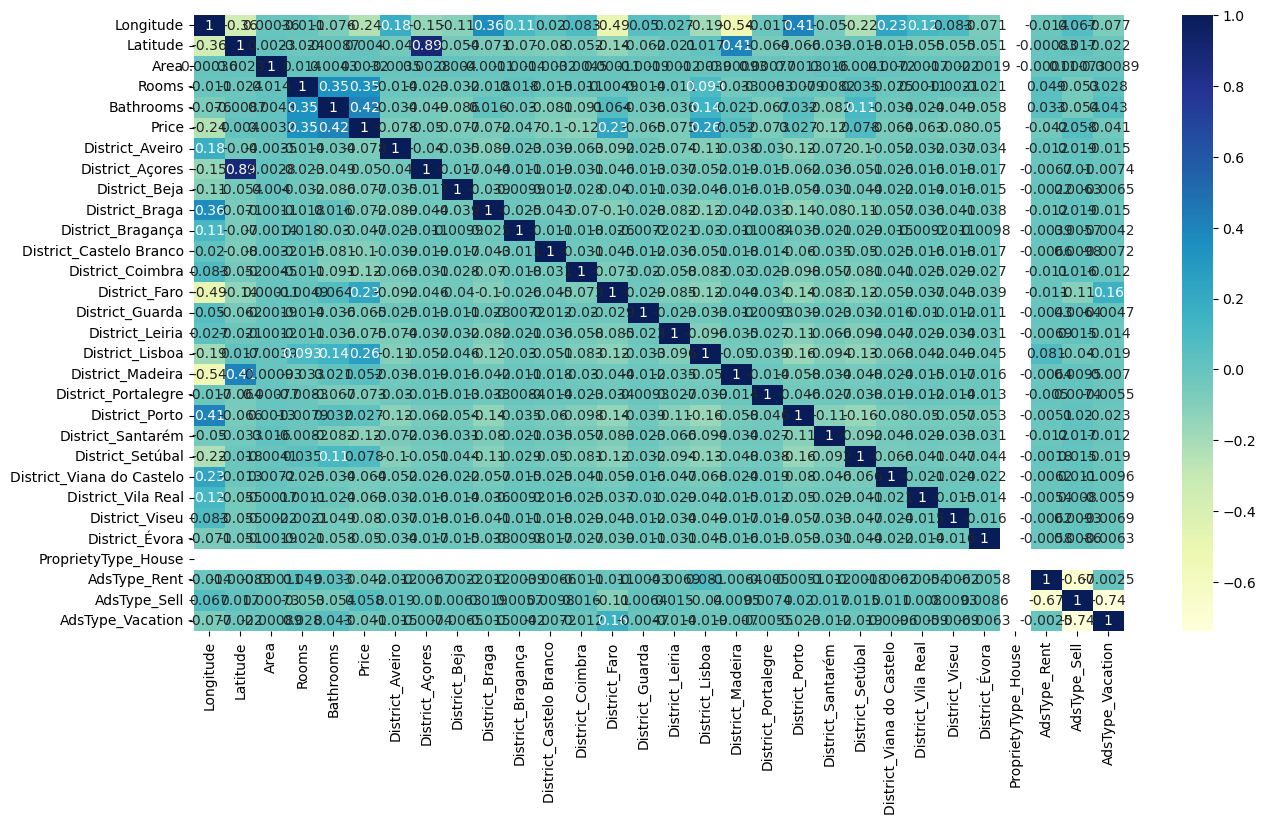

In [188]:
plt.figure(figsize=(15,8))
sns.heatmap(tr_df.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='Latitude', ylabel='Longitude'>

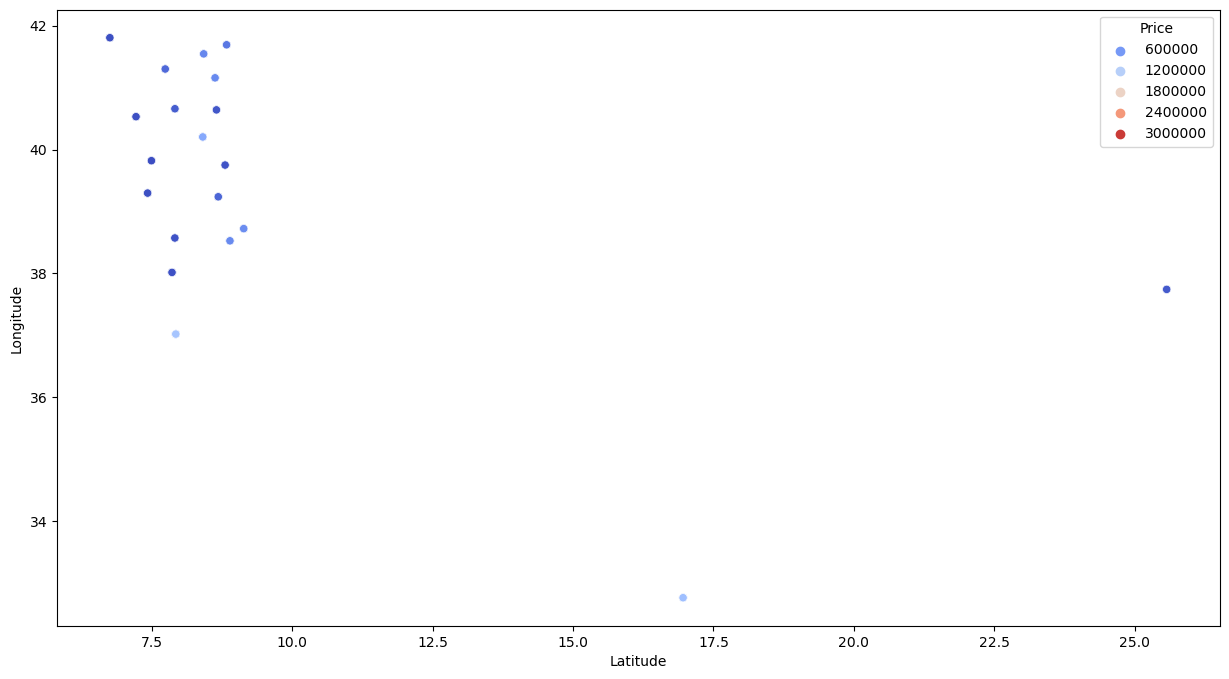

In [189]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Latitude', y='Longitude', data=tr_df, hue='Price', palette='coolwarm')

In [194]:
df['City'] = df['City'].str.strip()
df['City'].value_counts()

Seixal                    2171
Vila Nova de Gaia         2071
Cascais                   1497
Gondomar                  1390
Sesimbra                  1127
                          ... 
Vila Cortês do Mondego       1
Jarmelo São Miguel           1
Panoias de Cima              1
Aldeia Viçosa                1
Vale de Estrela              1
Name: City, Length: 587, dtype: int64

In [195]:
from sklearn.linear_model import LinearRegression

x_train, y_train = tr_df.drop(['Price'], axis=1), tr_df['Price']

reg = LinearRegression()

reg.fit(x_train, y_train)

ValueError: could not convert string to float: ' Covilhã'

In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)
print(f"Root Mean Squared Error: {rmse}")

ValueError: could not convert string to float: 'Aveiro'